##ACTIVIDAD SEMANAL 7 -- REGRESIONES Y K MEANS
##NOTEBOOK 1 - REGRESIÓN MULTIPLE

###Denisse María Ramírez Colmenero 

###A01561497



Materia: Ciencia y Analítica de Datos 

Profesora titular: Doc. María de la Paz Rico Fernández

Profesor tutor: Orlando Figón Cruz 

Fecha de entrega: 09 de Noviembre de 2022 

-------------------------------------------------------------------------------------------------------------------

##Ejercicio 2. Regresión múltiple. Encuentra el mejor regresor para los datos de las casas:

In [2]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import random
import seaborn as sns
np.random.seed(42)
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler

###Divide los datos. Utiliza la función train_test_split 

In [3]:
url2 = 'https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv'
df = pd.read_csv(url2)
print(df.shape)
df.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.drop('id',axis=1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)

columns = df.columns.drop('price')

features = columns
label = ['price']

Xm = df[features]
ym = df[label]

df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503


In [5]:
Xtrain, Xtest, ytrain, ytest = train_test_split(Xm, ym, test_size = 0.2, random_state = 101)
Xtest.shape #4323/21613 = 20% 

(4323, 15)

In [6]:
Xm.isnull().any()

bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [7]:
for column in df.columns: #checar la proporción de valores nulos. 
    proportion_of_nas = (sum(df[column].isnull())/len(df[column])) * 100 
    print(column, proportion_of_nas)

price 0.0
bedrooms 0.0
bathrooms 0.0
sqft_living 0.0
sqft_lot 0.0
floors 0.0
waterfront 0.0
view 0.0
condition 0.0
grade 0.0
sqft_above 0.0
sqft_basement 0.0
yr_built 0.0
yr_renovated 0.0
sqft_living15 0.0
sqft_lot15 0.0



###Regresión Múltiple Lineal.

Realiza la regresión lineal: modelo generado (ecuación), sus errores y r cuadrada.



In [8]:
regresion_multiple = linear_model.LinearRegression(fit_intercept=True)
model = regresion_multiple.fit(Xtrain,ytrain) #entrenamos el modelo 
yhat = model.predict(Xtest)
print("Los coeficientes son:", list(zip(regresion_multiple.coef_)))
print("El término independiente 'b' es:", regresion_multiple.intercept_)

Los coeficientes son: [(array([-3.71022526e+04,  4.01418845e+04,  1.09169906e+02,  2.64378621e-02,
        2.95338523e+04,  5.52048615e+05,  4.22004055e+04,  2.21281704e+04,
        1.21117318e+05,  5.02818538e+01,  5.88880527e+01, -3.52812693e+03,
        1.04703799e+01,  2.60075557e+01, -5.66471373e-01]),)]
El término independiente 'b' es: [6093360.93532767]


Multiple Regression Equation

Price = 6093360.93 + (-3.710e+04 * bedrooms) + (4.0141e+04 * bathrooms) + ( 1.09169906e+02 * sqft_living) + (2.64378621e-02 * sqft_lot) + (2.95338523e+04 * floors) + (5.52048615e+05 * waterfront) + (4.22e+04 * view) + (2.2128e+04 * condition) + (1.211e+05 * grade) + (5.028e+01 * sqft_above) + (5.888e+01 * sqft_basement) + (-3.528e+03 * yr_built) + (1.047e+01 * yr_renovated) + (2.6e+01 *	sqft_living15) +	(-5.66e+01 * sqft_lot15) 

In [10]:
print('Error medio Absoluto (MAE) del modelo:', metrics.mean_absolute_error(ytest, yhat))
print('Raíz del Error Cuadrático Medio (RMSE):', np.sqrt(metrics.mean_squared_error(ytest, yhat)))
print('R-cuadrada del modelo:', r2_score(ytest, yhat))

Error medio Absoluto (MAE) del modelo: 136332.19435816686
Raíz del Error Cuadrático Medio (RMSE): 213832.57523968336
R-cuadrada del modelo: 0.6648546558345214


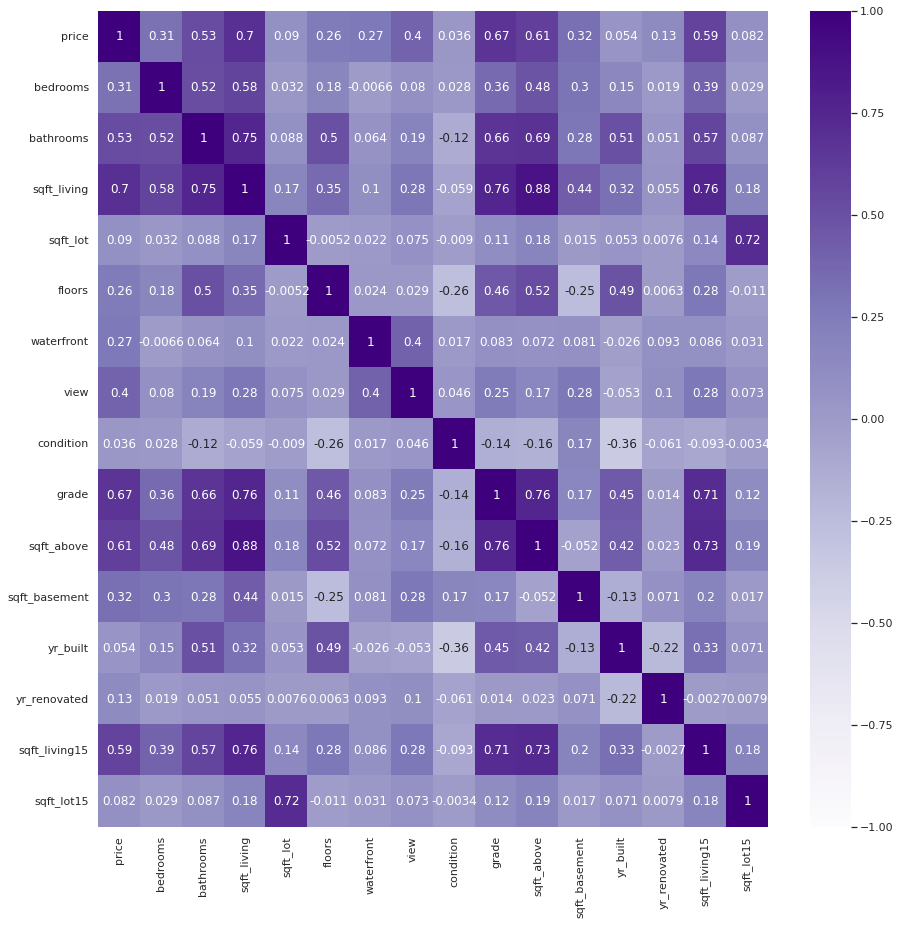

In [ ]:
df.corr()
corrs = df.corr()
sns.set(rc = {'figure.figsize':(15,15)})
sns.heatmap(corrs, vmin = -1, vmax = 1, cmap = "Purples", annot= True)

Con un mapa de calor podemos ver el nivel de correlación que tienen las variables unas con otras. Para la variable a predecir "price", las variables independientes que mayor contribución tienen para predecir dicha salida son "sqft_living" y "grade" que hacen referencia a los metros cuadrados de la casa y a la calificación que le da el sistema de King Country a la casa respectivamente. Dicho esto, haremos la visualización de la variable de salida respecto a sus variables independientes mas importantes en los ejes X. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


<Figure size 1080x1080 with 0 Axes>

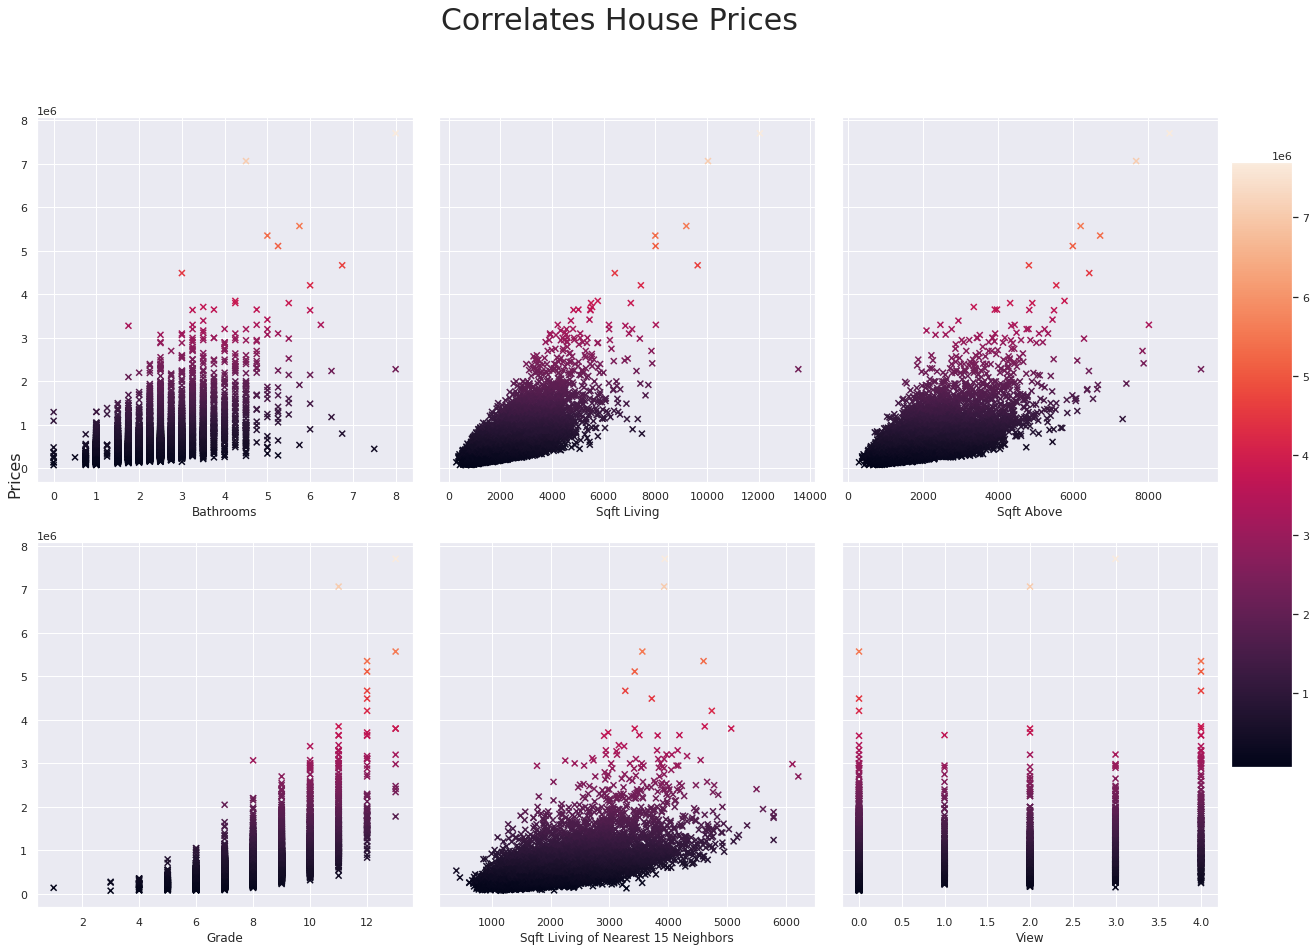

In [ ]:
f = plt.figure()
f, axes = plt.subplots(nrows = 2, ncols = 3, sharex=False, sharey = True, figsize=(17,12))

f.suptitle('Correlates House Prices', fontsize=30, y=1.1, fontname='Silom')
f.text(0.0001, 0.56, 'Prices', va='center', rotation='vertical', fontsize=16, fontname='Silom')

sc = axes[0][0].scatter(Xtrain["bathrooms"], ytrain['price'], c = ytrain['price'], marker = "x")
axes[0][0].set_xlabel('Bathrooms')

axes[1][0].scatter(Xtrain['grade'], ytrain['price'], c = ytrain['price'], marker = "x")
axes[1][0].set_xlabel('Grade')

axes[1][1].scatter(Xtrain['sqft_living15'], ytrain['price'], c = ytrain['price'], marker = "x")
axes[1][1].set_xlabel('Sqft Living of Nearest 15 Neighbors')

axes[1][2].scatter(Xtrain['view'], ytrain['price'], c =ytrain['price'], marker = "x")
axes[1][2].set_xlabel('View')

sc = axes[0][1].scatter(Xtrain['sqft_living'], ytrain['price'], c = ytrain['price'], marker = "x")
axes[0][1].set_xlabel('Sqft Living')

sc = axes[0][2].scatter(Xtrain['sqft_above'], ytrain['price'], c = ytrain['price'], marker = "x")
axes[0][2].set_xlabel('Sqft Above')

cbar_ax = f.add_axes([1, 0.22, 0.05, 0.7])

f.colorbar(sc, cax=cbar_ax)

f.tight_layout()

Conclusión: 
Una regresión múltiple es mucho mas compleja que una simple, debido a que pueden existir muchas variables independientes que intervengan en el proceso de predicción, más aun ya que algunas pueden son categóricas o numéricas. 
Para esta regresión multiple se eliminaron las variables del conjunto de datos que no tenian relación ni importancia a la hora de predecir el precio de las casas, como ID, codigo postal, fecha, etc. 

Siendo 15 variables independientes resulta muy complicado trazar el modelo a lo largo de los datos, pero para conocer si el modelo es apto para este conjunto de datos podemos guiarnos por las métricas de MAE y R2. El coeficiente de determinación tiene un valor de 0.66 lo que nos indica que el modelo es deficiente para predecir estos datos, y quizá necesitemos de un modelo con un grado más alto o alguna regularización. 


###Regresión Múltiple Polinomial.Realiza la regresión polinomial completa, tu modelo generado (ecuación), sus errores y r cuadrada.

In [ ]:
poly_model = PolynomialFeatures(degree=2, include_bias=False)
poly_x_values = poly_model.fit_transform(Xtrain)#entrenamiento 

regression_model = LinearRegression(fit_intercept=True)
regression_model.fit(poly_x_values, ytrain)

poly_x_values_test = poly_model.fit_transform(Xtest)
y_poly_m = regression_model.predict(poly_x_values_test)

print("Los coeficientes son:", list(zip(regression_model.coef_)))
print("El término independiente 'b' es:", regression_model.intercept_)

Los coeficientes son: [(array([ 1.01546643e+06, -1.17473872e+06,  4.88877447e+03, -3.02395414e+01,
       -2.04113893e+06, -3.37343967e+06, -2.32409396e+05,  4.65228240e+05,
        1.03575786e+06, -5.71901219e+03, -5.83036698e+03, -8.62721107e+04,
       -2.97762923e+03,  4.11361563e+03, -3.44994320e+01,  8.42532473e+02,
        7.44046499e+03,  1.53881562e+02, -2.73170746e-02,  8.98401278e+03,
       -2.67097659e+03, -4.19493722e+03, -4.62336967e+03, -4.80525443e+03,
       -1.68414573e+02, -1.81484361e+02, -5.13025931e+02, -1.21183364e+01,
        1.97855035e+01,  2.08711018e-01, -8.69294429e+03,  3.34053775e+01,
       -1.45256220e-01, -2.65020503e+04,  2.37750838e+04,  6.61632205e+03,
       -2.61014961e+03,  2.02295957e+04, -4.11022577e+00, -2.26468112e+01,
        5.57330897e+02, -1.82081568e+01, -2.01555218e+01, -5.51449943e-02,
        1.56502048e+03, -2.10969718e+03,  2.56839387e+00,  1.44609372e+02,
       -1.24053695e+01,  1.37365954e+01,  2.38333770e+01, -2.54754462e+03,
 

In [ ]:
print('Error medio Absoluto (MAE) del modelo:', metrics.mean_absolute_error(ytest, y_poly_m))
print('Raíz del Error Cuadrático Medio (RMSE):', np.sqrt(metrics.mean_squared_error(ytest, y_poly_m)))
print('R-cuadrada del modelo:', r2_score(ytest, y_poly_m))

Error medio Absoluto (MAE) del modelo: 122015.80006144893
Raíz del Error Cuadrático Medio (RMSE): 181470.06574727758
R-cuadrada del modelo: 0.7586232413126757


###Lasso.

 Incluye la ecuación de tu modelo, errores y r cuadrada.

In [ ]:
modelolasso= Pipeline([('polinomial', PolynomialFeatures(degree=2, include_bias=False)),
                        ('scaler', StandardScaler()), 
                        ('lasso', Lasso(alpha=0.01, random_state=42))])

In [ ]:
modelolasso.fit(Xtrain,ytrain)
y_pred_lasso = modelolasso.predict(Xtest)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.016e+14, tolerance: 2.323e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(Xtrain, ytrain)
print('Coeficiente del modelo Lasso es:',lasso.coef_)
print('Intercepción del modelo Lasso es:',lasso.intercept_)

Coeficiente del modelo Lasso es: [-3.71022399e+04  4.01418425e+04  2.97312642e+02  2.64377844e-02
  2.95338078e+04  5.52047149e+05  4.22004601e+04  2.21281435e+04
  1.21117305e+05 -1.37860837e+02 -1.29254666e+02 -3.52812643e+03
  1.04704061e+01  2.60075502e+01 -5.66471388e-01]
Intercepción del modelo Lasso es: [6093360.18325204]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.682e+14, tolerance: 2.323e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
print('Error medio Absoluto (MAE) del modelo:', metrics.mean_absolute_error(ytest, y_pred_lasso))
print('Raíz del Error Cuadrático Medio (RMSE):', np.sqrt(metrics.mean_squared_error(ytest, y_pred_lasso)))
print('R-cuadrada del modelo:', r2_score(ytest, y_pred_lasso))

Error medio Absoluto (MAE) del modelo: 122937.44249018596
Raíz del Error Cuadrático Medio (RMSE): 183325.43265649356
R-cuadrada del modelo: 0.7536622926250723


###Ridge. 

Incluye la ecuación de tu modelo, errores y r cuadrada.

In [ ]:
modeloridge= Pipeline([('polinomial', PolynomialFeatures(degree=2, include_bias=False)),
                        ('scaler', StandardScaler()), 
                        ('ridge', Ridge(alpha=10, random_state=42))])

In [ ]:
modeloridge.fit(Xtrain,ytrain)
y_pred_ridge = modeloridge.predict(Xtest)

In [ ]:
ridge = Ridge(alpha=10, random_state=42)
ridge.fit(Xtrain, ytrain)
print('Coeficiente del modelo Ridge es:',ridge.coef_)
print('Intercepción del modelo Ridge es:',ridge.intercept_)

Coeficiente del modelo Ridge es: [[-3.72834617e+04  3.99968523e+04  1.09368623e+02  2.41914350e-02
   2.95181032e+04  5.06949843e+05  4.42754441e+04  2.21944225e+04
   1.20908045e+05  5.06156426e+01  5.87531160e+01 -3.52440491e+03
   1.10708476e+01  2.58010214e+01 -5.64531304e-01]]
Intercepción del modelo Ridge es: [6087595.57156075]


In [ ]:
print('Error medio Absoluto (MAE) del modelo:', metrics.mean_absolute_error(ytest, y_pred_ridge))
print('Raíz del Error Cuadrático Medio (RMSE):', np.sqrt(metrics.mean_squared_error(ytest, y_pred_ridge)))
print('R-cuadrada del modelo:', r2_score(ytest, y_pred_ridge))

Error medio Absoluto (MAE) del modelo: 122998.91347420678
Raíz del Error Cuadrático Medio (RMSE): 183517.94489484766
R-cuadrada del modelo: 0.7531446566103261


###Finalmente gráfica :
MAE (de los cuatro métodos)
R2 (de los cuatro métodos)

In [ ]:
MAE_RL= metrics.mean_absolute_error(ytest, yhat)
MAE_POLI = metrics.mean_absolute_error(ytest, y_poly_m)
MAE_LASSO = metrics.mean_absolute_error(ytest, y_pred_lasso)
MAE_RIDGE = metrics.mean_absolute_error(ytest, y_pred_ridge)

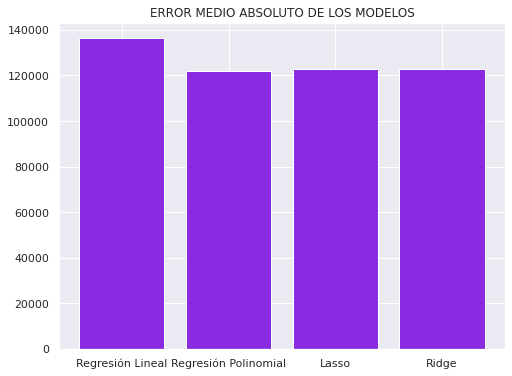

In [ ]:
modelos = [MAE_RL,MAE_POLI , MAE_LASSO,MAE_RIDGE]
nombres = ['Regresión Lineal', 'Regresión Polinomial', 'Lasso', 'Ridge']
sns.set(rc={'figure.figsize':(8,6)})
plt.title("ERROR MEDIO ABSOLUTO DE LOS MODELOS")
plt.bar(nombres, modelos, color='blueviolet')
plt.show()

In [ ]:
print('MAE Regresión Lineal:',MAE_RL,'\nMAE Regresión Polinomial:',MAE_POLI, '\nMAE Lasso:',MAE_LASSO, '\nMAE Ridge:',MAE_RIDGE)

MAE Regresión Lineal: 136332.19435816686 
MAE Regresión Polinomial: 122015.80006144893 
MAE Lasso: 122937.44249018596 
MAE Ridge: 122998.91347420678


In [ ]:
R2_RL = r2_score(ytest, yhat)
R2_POLI = r2_score(ytest, y_poly_m)
R2_LASSO = r2_score(ytest, y_pred_lasso)
R2_RIDGE = r2_score(ytest, y_pred_ridge)

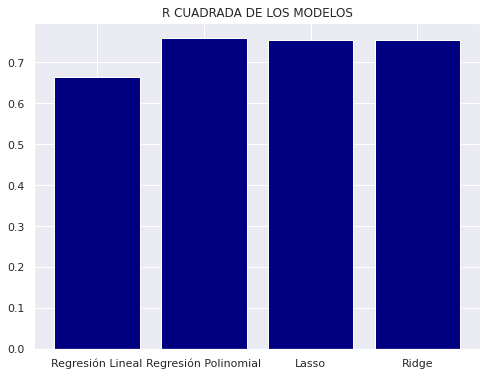

In [ ]:
modelosr = [R2_RL,R2_POLI ,R2_LASSO,R2_RIDGE]
nombres = ['Regresión Lineal', 'Regresión Polinomial', 'Lasso', 'Ridge']
sns.set(rc={'figure.figsize':(8,6)})
plt.title("R CUADRADA DE LOS MODELOS")
plt.bar(nombres, modelosr, color='navy')
plt.show()

In [ ]:
print('R2 Regresión Lineal:',R2_RL,'\nR2 Regresión Polinomial:',R2_POLI, '\nR2 Lasso:',R2_LASSO, '\nR2 Ridge:',R2_RIDGE)

R2 Regresión Lineal: 0.6648546558345214 
R2 Regresión Polinomial: 0.7586232413126757 
R2 Lasso: 0.7536622926250723 
R2 Ridge: 0.7531446566103261


Explica tus resultados

1. ¿Qué método se aproxima mejor, ¿por qué?

Considero que para este conjunto de datos, los modelos de Regresión Polinomial, Lasso y Ridge tienen casi el mismo valor del coeficiente de determinación R2, por lo que considero que sería mejor usar Lasso o Ridge ya que a mi parecer son más fáciles de implementar e interpretar que el de Regresión Polinomial, además de que podemos jugar un poco con el alpha y tenemos la libertad de cambiarlo según nos convenga. Incluso también podríamos cambiar el grado polinómico dentro de la regularización o simplemente no ponerlo, por lo que considero que para la empresa es mejor utilizar alguno de estos. 

2. ¿Qué porcentajes de entrenamiento y evaluación usaste? 

Para este ejercicio se utilizó un porcentaje de 80% para entrenamiento y 20% para prueba ya que al ser un conjunto de datos de más de 20,000 muestras, el modelo tiene suficiente con un 80% para entrenarse. 

3. ¿Que error tienes?, ¿es bueno?, ¿Cómo lo sabes?

Sabemos que para una regresión simple lo más útil para medir el desempeño de nuestro modelo es simplemente gráficar su curva predictiva con sus datos, sin embargo para un conjunto de datos multivariable esta no es una opción debido a la gran cantidad de dimensiones que tendríamos que graficar, es por eso que nuestra única salida es basarnos en las otras métricas de desempeño. 

El coeficiente de determinación r2 nos da siempre un valor entre 0 y 1, lo cual es bastante fácil de interpretar ya que entre más cercano a 1 sea, mejor será el ajuste del modelo. Para los modelos Lasso y Ridge nos dan un valor de 0.75 lo que significa que es un modelo regular, no es malo pero tampoco excelente, ya que estaríamos diciendo que el modelo explica alrededor del 75% de la variabilidad. 
También debemos tomar en cuenta que esta métrica no excluye a las variables explicativas que no tienen mucho peso en la predicción de la variable de salida, por lo que el valor de r2 puede aumentar si existen esas variables aunque no tengan nada que ver con la predicción, por lo que el valor de r2 no no estaría hablando del porcentaje de ajuste verdadero.  

Para el caso del error MAE podemos decir que no es una buena métrica de desempeño para este conjunto de datos ya que este error se basa en la diferencia entre la variable real y la predecida y ya que la variable de salida es el precio de las casas y es en dolares, pues lógicamente estos errores parecen muy altos, pero es simplemente por la escala de la variable "price". Igualmente, entre menor sea, es mejor. 



REFERENCIAS: 

1. Fisher, A. (2022, 30 marzo). Predicting King County House Prices with Multiple Linear Regression. Medium. https://medium.com/analytics-vidhya/predicting-king-county-house-prices-with-multiple-linear-regression-84de5feeafb2

2. Gonzalez, L. (2022, 1 septiembre). Evaluando el error en los modelos de regresión [Vídeo]. 🤖 Aprende IA. https://aprendeia.com/evaluando-el-error-en-los-modelos-de-regresion/

3. Kaplan, D. (2022, 3 septiembre). Multivariate Polynomial Regression Python (Full Code) ». EML. https://enjoymachinelearning.com/blog/multivariate-polynomial-regression-python/